<a href="https://colab.research.google.com/github/npipal/food-sales-predictions/blob/main/Food_Sales_Predictions_NickPipal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Project 1 - Part 2**

**1) How many rows and columns?**

In [ ]:
df.shape

(8523, 12)

**2) What are the datatypes of each variable?**

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3) Are there duplicates? If so, drop any duplicates.**

In [ ]:
df.duplicated().sum()

0

**4) Identify missing values.**

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).**

**Addresing missing values for Outlet_Size**

In [ ]:
#Filling any missing data with 'NOTGIVEN'
df['Outlet_Size'].fillna('NOTGIVEN', inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Adressing missing values for Item_Weight**

In [ ]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
#Fill in any missing data with the mean
df['Item_Weight'].fillna(round(df['Item_Weight'].mean(),2), inplace = True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**6) Confirm that there are no missing values after addressing them.**

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**7) Find and fix any inconsistent categories of data(example: fix cat, Cat, and cats so that they are consistent)**

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#replacing inconsistent values to clean up the data in Item_Fat_Content
df.replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace = True)
df.replace(['reg'], ['Regular'], inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**8) For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.860000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Project 1 - Part 3**

1. Histogram to view the distributions of various features in your dataset.

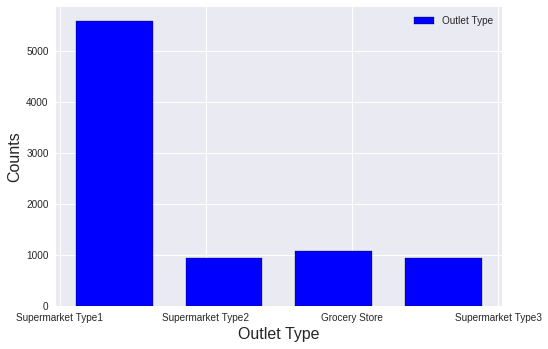

In [ ]:
#Histogram of Outlet Type
plt.style.use('seaborn')
df['Outlet_Type'].hist(bins =4, label='Outlet Type', edgecolor='black', rwidth=0.7, color='blue')
plt.xlabel('Outlet Type', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.legend();

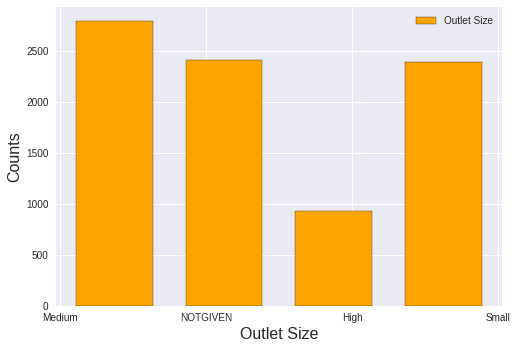

In [ ]:
#Histogram of Outlet Size
plt.style.use('seaborn')
df['Outlet_Size'].hist(bins =4, label='Outlet Size', edgecolor='black', rwidth=0.7, color='orange')
plt.xlabel('Outlet Size', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.legend();

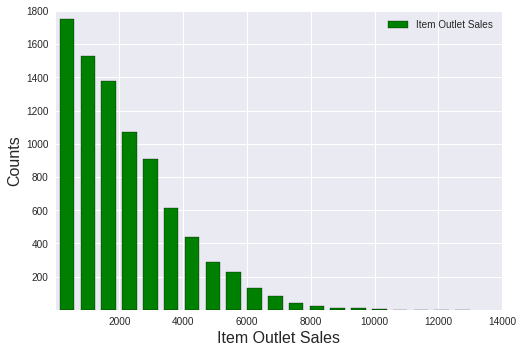

In [ ]:
#Histogram of Item Outlet Sales
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins=20, label='Item Outlet Sales', edgecolor='black', rwidth=0.7, color='green')
plt.xlabel('Item Outlet Sales', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xlim(1,14000)
plt.ylim(1,1800)
plt.legend();

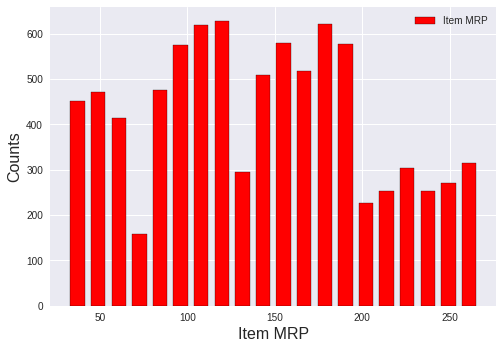

In [ ]:
#Histogram of Item MRP
plt.style.use('seaborn')
df['Item_MRP'].hist(bins=20, label='Item MRP', edgecolor='black', rwidth=0.7, color='red')
plt.xlabel('Item MRP', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.legend();

2. Boxplot to view statistical summaries of various features in your dataset.

Text(0.5, 1.0, 'Item Outlet Sales')

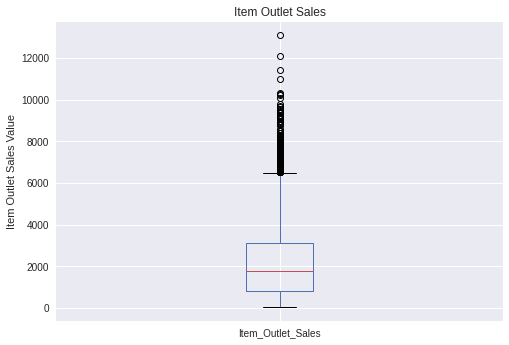

In [ ]:
#Item Outlet Sales boxplot lots of outliers
df.boxplot('Item_Outlet_Sales');
plt.ylabel('Item Outlet Sales Value')
plt.title('Item Outlet Sales')

Text(0.5, 1.0, 'Item MRP Sales')

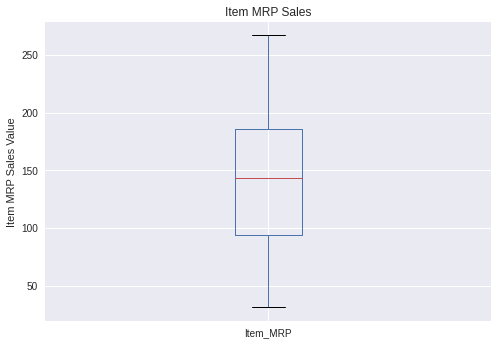

In [ ]:
#Item MRP boxplot
df.boxplot('Item_MRP');
plt.ylabel('Item MRP Sales Value')
plt.title('Item MRP Sales')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

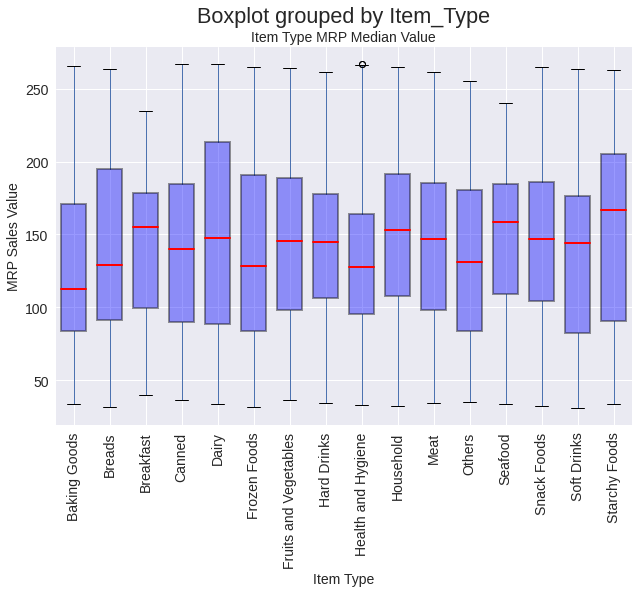

In [ ]:
plt.style.use('seaborn')
df.boxplot(by='Item_Type', column='Item_MRP', figsize=(10,7), widths=.7, patch_artist=True,
           medianprops=dict(linestyle='-', linewidth=2, color='red'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
           );
plt.ylabel('MRP Sales Value', fontsize=14)
plt.xlabel('Item Type', fontsize=14)
plt.title('Item Type MRP Median Value', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)

3. Heatmap of the correlation between features.

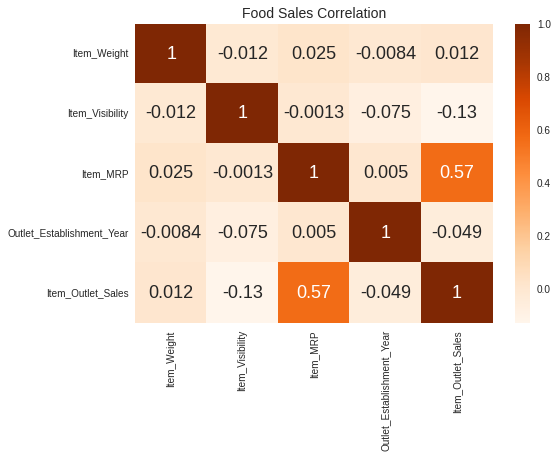

In [ ]:
sns.heatmap(df.corr(), cmap = 'Oranges', annot= True).set_title('Food Sales Correlation', fontsize=14);

### Project 1 Part 4

- Build on your previous cleaning, exploration, and analysis.  

- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).

- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

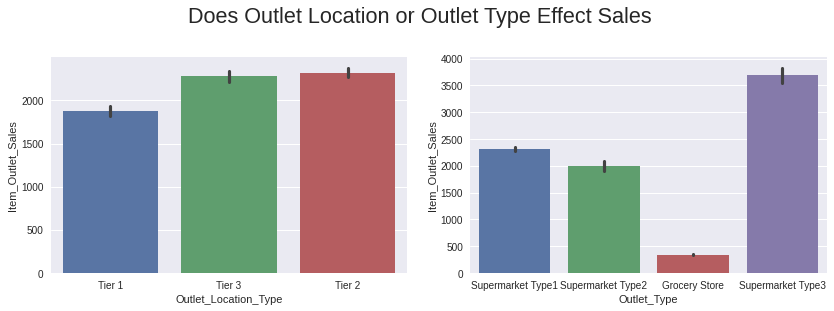

In [ ]:
#Does Outlet Location Type or Outlet Type effect the number of sales at a store. 
fig, axes= plt.subplots(ncols=2, figsize=(12,4))
sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', ax=axes[0])
sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=axes[1])

fig.suptitle('Does Outlet Location or Outlet Type Effect Sales', y=1.1)
plt.tight_layout()

It appears that Location type does have an impact on Outlet Sales as Tier and Tier 3 Locations have higher sales than Tier 1. Outlet type does have a impact on sales as Supermarket Types 1, 2, and 3 all have higher sales than does a Grocery Store. 



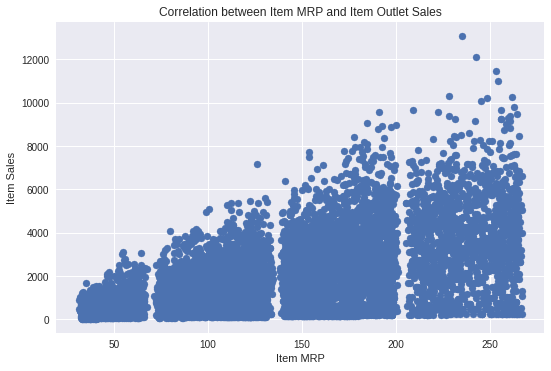

In [160]:
plt.style.use('seaborn')
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.title('Correlation between Item MRP and Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Sales')
plt.tight_layout()
plt.show()

Item MRP (Maximum Retail Price) does have a positive correlation with Item Sales in that the higher the MRP the more4 items are being sold as shown by the Scatter Plot. 

In [ ]:
sns.set_context('talk')

In [ ]:
groupby_ItemType = df.groupby('Item_Type').mean()

Text(0.5, 1.0, 'Total Item Sales by Type')

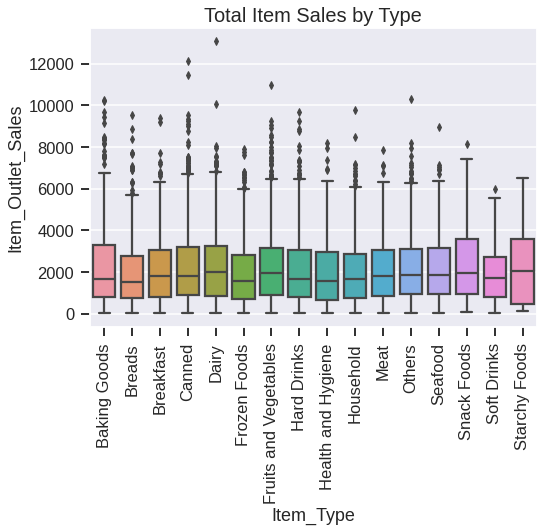

In [ ]:
ax = sns.boxplot(data=df, x = 'Item_Type', y='Item_Outlet_Sales')
ax.set_xticklabels(groupby_ItemType.index, rotation= 90)
ax.set_title('Total Item Sales by Type', fontsize=20)

The 25th Quartile, Median, 75th Quartile, and Max for every Item Type is very similar in value. There are a good amount of outliers in this given plot that range from about 6000-13500 depending on the Maximum of the Item Type. 